In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [2]:
df=pd.read_csv("poverty_dataset.csv")
df.head()

country  year reporting_level welfare_type  ppp_version  survey_year  \
0  Albania  1996        national  consumption         2011       1996.0   
1  Albania  2002        national  consumption         2011       2002.0   
2  Albania  2005        national  consumption         2011       2005.0   
3  Albania  2008        national  consumption         2011       2008.0   
4  Albania  2012        national  consumption         2011       2012.0   

   survey_comparability  headcount_ratio_international_povline  \
0                   0.0                               0.920669   
1                   1.0                               1.570843   
2                   1.0                               0.860527   
3                   1.0                               0.313650   
4                   1.0                               0.849754   

   headcount_ratio_lower_mid_income_povline  \
0                                 11.174149   
1                                 14.132118   
2                                  8.715685   
3                                  5.250542   
4                                  6.182414   

   headcount_ratio_upper_mid_income_povline  ...  decile8_thr  decile9_thr  \
0                                 44.618417  ...         8.85        10.92   
1                                 49.669635  ...         8.83        11.58   
2                                 38.545254  ...        10.02        12.78   
3                                 31.110345  ...        10.74        13.62   
4                                 34.528906  ...        10.52        13.26   

       gini       mld  polarization  palma_ratio  s80_s20_ratio  \
0  0.270103  0.119104      0.241293     0.928335       3.945872   
1  0.317390  0.164812      0.268982     1.215056       4.831625   
2  0.305957  0.154413      0.254529     1.142718       4.662236   
3  0.299847  0.148893      0.247311     1.114657       4.395911   
4  0.289605  0.138417      0.249988     1.041193       4.272573   

   p90_p10_ratio  p90_p50_ratio  p50_p10_ratio  
0       3.568627       1.889273       1.888889  
1       3.979381       2.090253       1.903780  
2       3.872727       1.978328       1.957576  
3       3.574803       1.956897       1.826772  
4       3.632877       1.941435       1.871233  

[5 rows x 108 columns]

In [34]:
df.columns

Index(['country', 'year', 'reporting_level', 'welfare_type', 'ppp_version',
       'survey_year', 'survey_comparability',
       'headcount_ratio_international_povline',
       'headcount_ratio_lower_mid_income_povline',
       'headcount_ratio_upper_mid_income_povline',
       ...
       'decile8_thr', 'decile9_thr', 'gini', 'mld', 'polarization',
       'palma_ratio', 's80_s20_ratio', 'p90_p10_ratio', 'p90_p50_ratio',
       'p50_p10_ratio'],
      dtype='object', length=108)

In [4]:
df.shape

(4877, 108)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Columns: 108 entries, country to p50_p10_ratio
dtypes: float64(103), int64(2), object(3)
memory usage: 4.0+ MB


In [6]:
df.isnull().sum()

country              0
year                 0
reporting_level    466
welfare_type       466
ppp_version          0
                  ... 
palma_ratio        482
s80_s20_ratio      482
p90_p10_ratio        0
p90_p50_ratio        0
p50_p10_ratio        0
Length: 108, dtype: int64

In [7]:
for i in df.columns:
    print(i,(df[i].isnull().sum()))

country 0
year 0
reporting_level 466
welfare_type 466
ppp_version 0
survey_year 466
survey_comparability 466
headcount_ratio_international_povline 0
headcount_ratio_lower_mid_income_povline 0
headcount_ratio_upper_mid_income_povline 0
headcount_ratio_100 0
headcount_ratio_1000 0
headcount_ratio_2000 0
headcount_ratio_3000 0
headcount_ratio_4000 0
headcount_ratio_40_median 466
headcount_ratio_50_median 466
headcount_ratio_60_median 466
headcount_international_povline 0
headcount_lower_mid_income_povline 0
headcount_upper_mid_income_povline 0
headcount_100 0
headcount_1000 0
headcount_2000 0
headcount_3000 0
headcount_4000 0
headcount_40_median 466
headcount_50_median 466
headcount_60_median 466
avg_shortfall_international_povline 291
avg_shortfall_lower_mid_income_povline 100
avg_shortfall_upper_mid_income_povline 12
avg_shortfall_100 750
avg_shortfall_1000 6
avg_shortfall_2000 0
avg_shortfall_3000 0
avg_shortfall_4000 0
avg_shortfall_40_median 468
avg_shortfall_50_median 466
avg_shortf

In [8]:
print(df['country'].value_counts())


Indonesia       174
China           120
Poland           92
Romania          74
India            72
               ... 
Suriname          2
Lebanon           2
Tuvalu            2
Turkmenistan      2
Somalia           2
Name: country, Length: 177, dtype: int64


In [9]:
print(df['headcount_ratio_international_povline'].value_counts())

0.000000     291
0.089330       5
0.016102       5
0.077125       4
0.052716       4
            ... 
1.250736       1
1.607562       1
2.889901       1
9.789037       1
39.754533      1
Name: headcount_ratio_international_povline, Length: 4037, dtype: int64


In [10]:
desired_country = 'Albania'
country_data = df[df['country'] == desired_country]
print(country_data)

      country  year reporting_level welfare_type  ppp_version  survey_year  \
0     Albania  1996        national  consumption         2011       1996.0   
1     Albania  2002        national  consumption         2011       2002.0   
2     Albania  2005        national  consumption         2011       2005.0   
3     Albania  2008        national  consumption         2011       2008.0   
4     Albania  2012        national  consumption         2011       2012.0   
5     Albania  2014        national  consumption         2011       2014.0   
6     Albania  2015        national  consumption         2011       2015.0   
7     Albania  2016        national  consumption         2011       2016.0   
8     Albania  2016        national       income         2011       2016.0   
9     Albania  2017        national  consumption         2011       2017.0   
10    Albania  2017        national       income         2011       2017.0   
11    Albania  2018        national  consumption         2011   

In [11]:
desired_country = 'Zimbabwe'
country_data = df[df['country'] == desired_country]
print(country_data)

       country  year reporting_level welfare_type  ppp_version  survey_year  \
2436  Zimbabwe  2011        national  consumption         2011       2011.0   
2437  Zimbabwe  2017        national  consumption         2011       2017.0   
2438  Zimbabwe  2019        national  consumption         2011       2019.0   
4874  Zimbabwe  2011        national  consumption         2017       2011.0   
4875  Zimbabwe  2017        national  consumption         2017       2017.0   
4876  Zimbabwe  2019        national  consumption         2017       2019.0   

      survey_comparability  headcount_ratio_international_povline  \
2436                   0.0                              21.355553   
2437                   0.0                              33.863872   
2438                   0.0                              39.532140   
4874                   0.0                              21.580063   
4875                   0.0                              34.206046   
4876                   0.0      

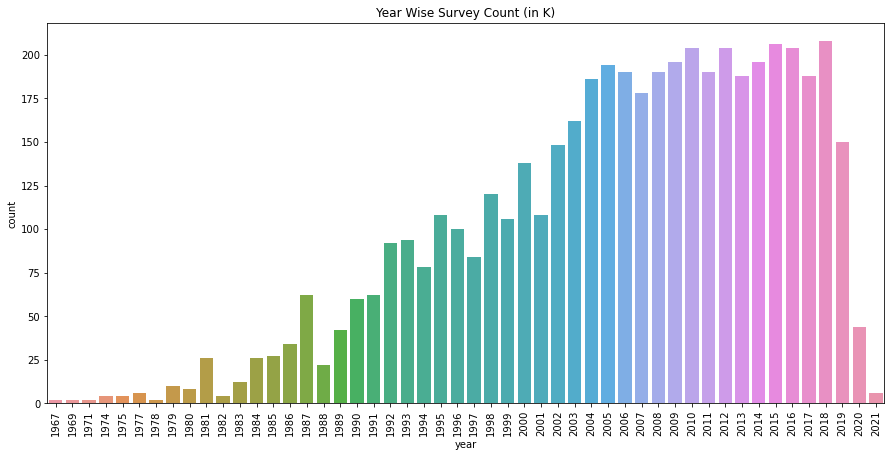

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='year')
plt.title("Year Wise Survey Count (in K)")
plt.xticks(rotation=90)
plt.show()

In [3]:
year_df = pd.DataFrame()
year_df['Values'] = df['year'].value_counts()
year_df['year']=year_df.index
year_df

Values  year
2018     208  2018
2015     206  2015
2012     204  2012
2016     204  2016
2010     204  2010
2014     196  2014
2009     196  2009
2005     194  2005
2011     190  2011
2008     190  2008
2006     190  2006
2013     188  2013
2017     188  2017
2004     186  2004
2007     178  2007
2003     162  2003
2019     150  2019
2002     148  2002
2000     138  2000
1998     120  1998
2001     108  2001
1995     108  1995
1999     106  1999
1996     100  1996
1993      94  1993
1992      92  1992
1997      84  1997
1994      78  1994
1991      62  1991
1987      62  1987
1990      60  1990
2020      44  2020
1989      42  1989
1986      34  1986
1985      27  1985
1984      26  1984
1981      26  1981
1988      22  1988
1983      12  1983
1979      10  1979
1980       8  1980
1977       6  1977
2021       6  2021
1982       4  1982
1975       4  1975
1974       4  1974
1971       2  1971
1978       2  1978
1967       2  1967
1969       2  1969

In [4]:
fg = px.bar(year_df,x='year',y='Values',color='year',title='Year Wise Survey Count (in K)',template='seaborn')
fg.update_layout(xaxis={'categoryorder':'total descending'},xaxis_title='year',yaxis_title = 'Survey Count in K',xaxis_tickangle=-45, margin=dict(b=100),width=1000)
fg.show()

In [15]:
df.columns

Index(['country', 'year', 'reporting_level', 'welfare_type', 'ppp_version',
       'survey_year', 'survey_comparability',
       'headcount_ratio_international_povline',
       'headcount_ratio_lower_mid_income_povline',
       'headcount_ratio_upper_mid_income_povline',
       ...
       'decile8_thr', 'decile9_thr', 'gini', 'mld', 'polarization',
       'palma_ratio', 's80_s20_ratio', 'p90_p10_ratio', 'p90_p50_ratio',
       'p50_p10_ratio'],
      dtype='object', length=108)

In [16]:
df['country'].value_counts()

Indonesia       174
China           120
Poland           92
Romania          74
India            72
               ... 
Suriname          2
Lebanon           2
Tuvalu            2
Turkmenistan      2
Somalia           2
Name: country, Length: 177, dtype: int64

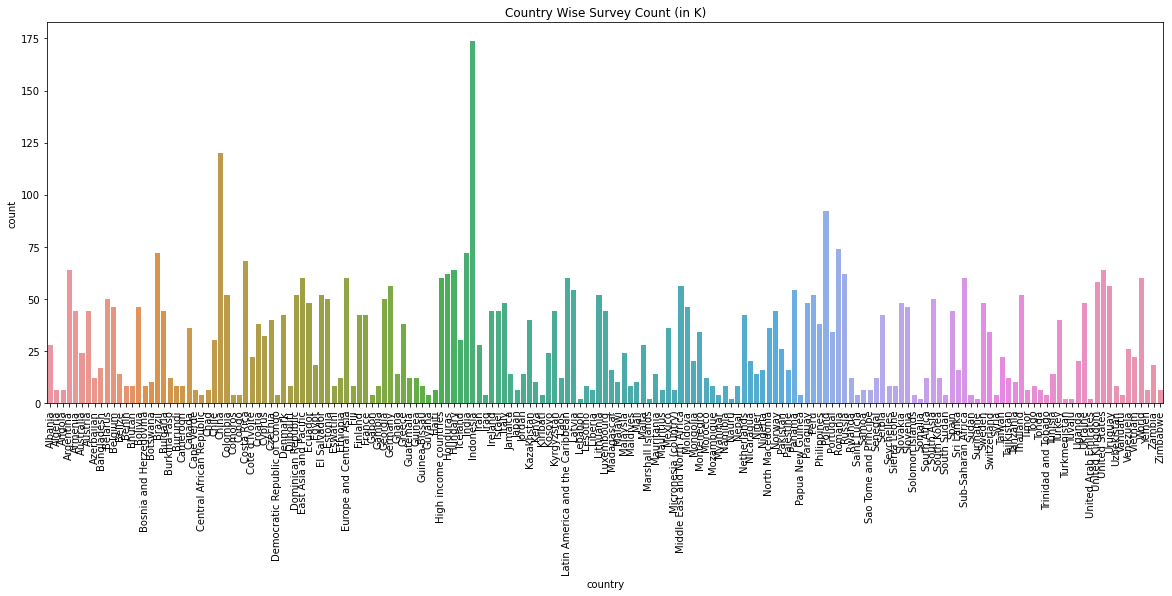

In [17]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='country')
plt.title("Country Wise Survey Count (in K)")
plt.xticks(rotation=90)
plt.show()

In [7]:
country_df = pd.DataFrame()
country_df['Values'] = df['country'].value_counts()
country_df

Values
Indonesia        174
China            120
Poland            92
Romania           74
India             72
...              ...
Suriname           2
Lebanon            2
Tuvalu             2
Turkmenistan       2
Somalia            2

[177 rows x 1 columns]

In [8]:
country_df.columns

Index(['Values'], dtype='object')

In [9]:
country_df['country']=country_df.index
country_df

Values       country
Indonesia        174     Indonesia
China            120         China
Poland            92        Poland
Romania           74       Romania
India             72         India
...              ...           ...
Suriname           2      Suriname
Lebanon            2       Lebanon
Tuvalu             2        Tuvalu
Turkmenistan       2  Turkmenistan
Somalia            2       Somalia

[177 rows x 2 columns]

In [10]:
fig = px.bar(country_df,x='country',y='Values',color='country',title='country Wise Survey Count (in K)',template='plotly')
fig.update_layout(xaxis_title = 'Country',width=6000,height=600,yaxis_title = 'Count in K',xaxis_tickangle=-45)
fig.show()

In [9]:
df['reporting_level'].value_counts()

national    4049
urban        236
rural        126
Name: reporting_level, dtype: int64

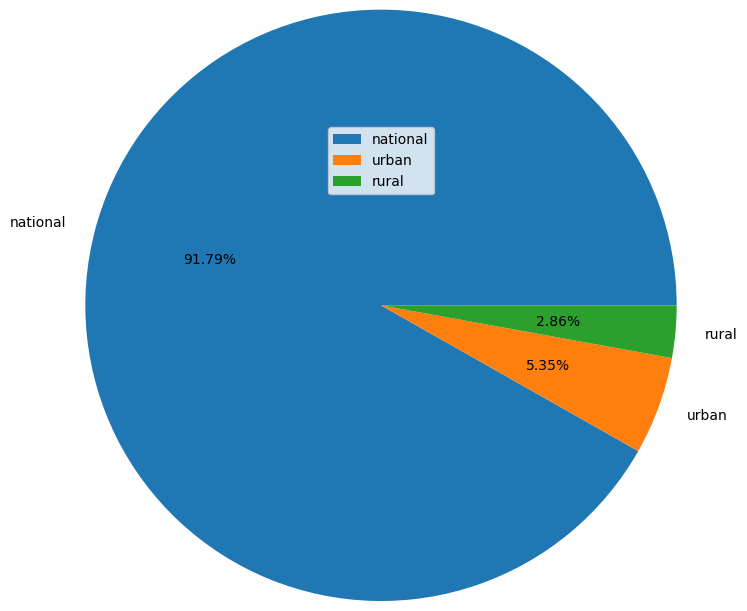

In [10]:
plt.pie(x=df['reporting_level'].value_counts(),labels=['national','urban','rural'],radius=2,autopct='%.2f%%')
plt.legend(loc='upper center')

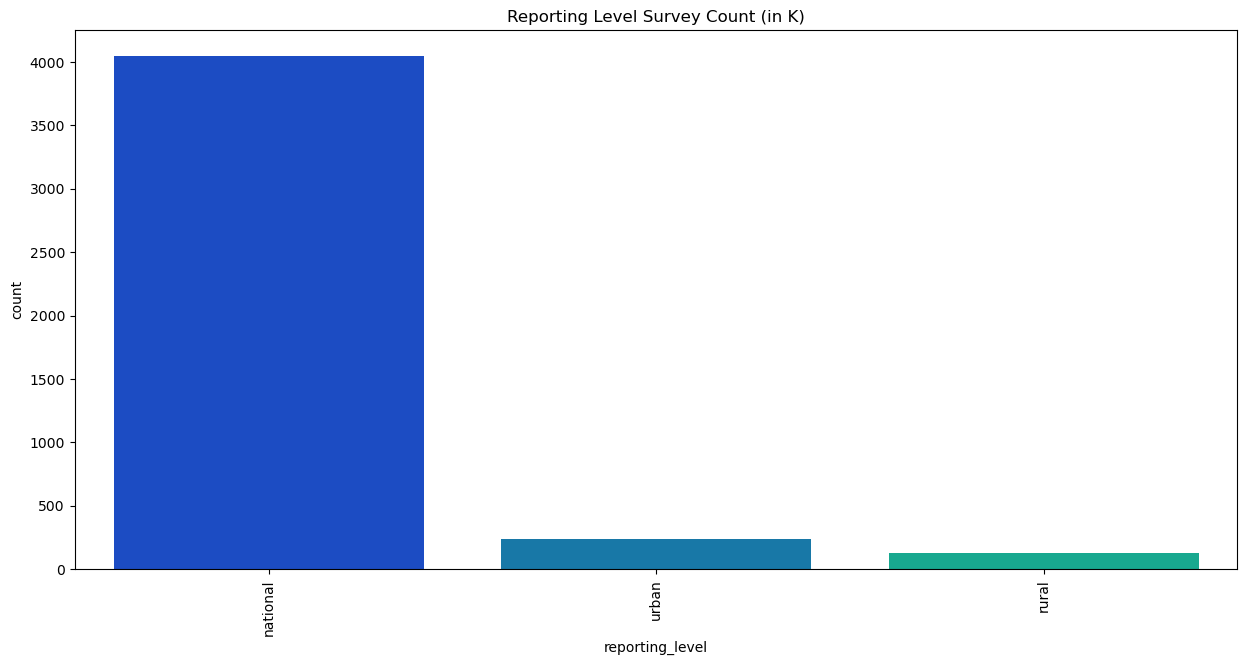

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='reporting_level',palette='winter')
plt.title("Reporting Level Survey Count (in K)")
plt.xticks(rotation=90)
plt.show()

In [12]:
df['welfare_type'].value_counts()

income         2464
consumption    1947
Name: welfare_type, dtype: int64

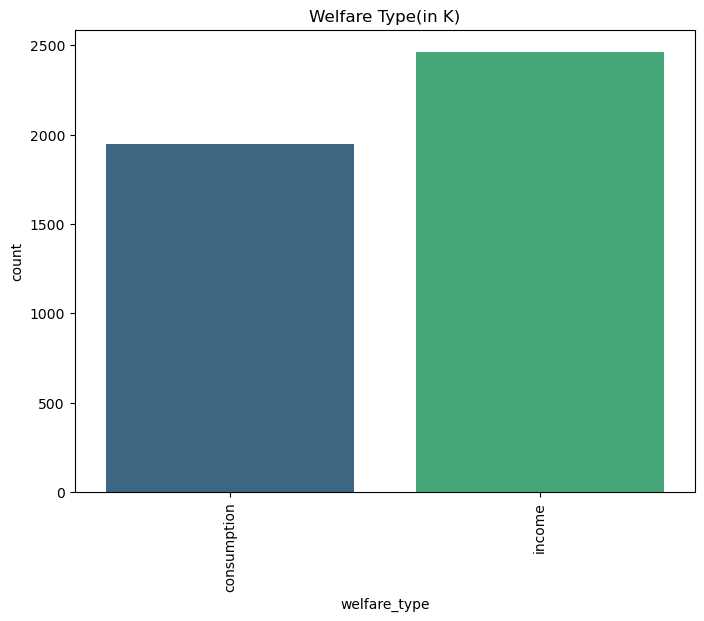

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='welfare_type',palette='viridis')
plt.title("Welfare Type(in K)")
plt.xticks(rotation=90)
plt.show()

In [14]:
df.columns

Index(['country', 'year', 'reporting_level', 'welfare_type', 'ppp_version',
       'survey_year', 'survey_comparability',
       'headcount_ratio_international_povline',
       'headcount_ratio_lower_mid_income_povline',
       'headcount_ratio_upper_mid_income_povline',
       ...
       'decile8_thr', 'decile9_thr', 'gini', 'mld', 'polarization',
       'palma_ratio', 's80_s20_ratio', 'p90_p10_ratio', 'p90_p50_ratio',
       'p50_p10_ratio'],
      dtype='object', length=108)

In [15]:
df['survey_comparability'].value_counts()

1.0    1322
0.0    1035
2.0     972
3.0     624
5.0     224
4.0     216
6.0      18
Name: survey_comparability, dtype: int64

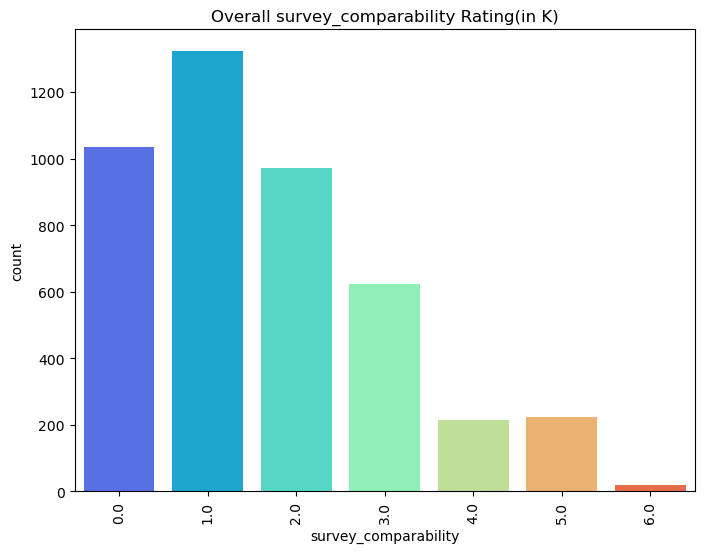

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='survey_comparability',palette='rainbow')
plt.title("Overall survey_comparability Rating(in K)")
plt.xticks(rotation=90)
plt.show()

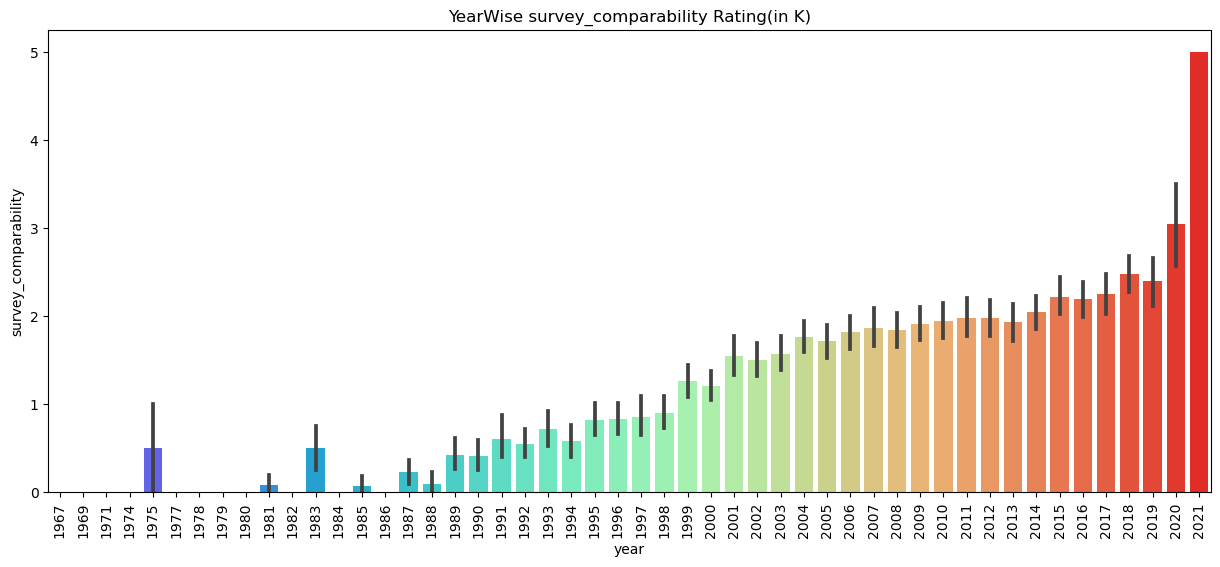

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x='year',y='survey_comparability',palette='rainbow')
plt.title("YearWise survey_comparability Rating(in K)")
plt.xticks(rotation=90)
plt.show()

In [12]:
fig = px.bar(df,x='year',y='survey_comparability',color='year',title='Year wise comparability rating',template='seaborn')
fig.update_layout(xaxis_title = 'year',yaxis_title = 'comparability',xaxis_tickangle=-45)
fig.show()

In [11]:
fig = px.bar(df,x='country',y='survey_comparability',color='year',title='Country wise comparability rating',template='ggplot2')
fig.update_layout(xaxis_title = 'Country',yaxis_title = 'comparability',xaxis_tickangle=-45)
fig.show()

In [33]:
df.columns

Index(['country', 'year', 'reporting_level', 'welfare_type', 'ppp_version',
       'survey_year', 'survey_comparability',
       'headcount_ratio_international_povline',
       'headcount_ratio_lower_mid_income_povline',
       'headcount_ratio_upper_mid_income_povline',
       ...
       'decile8_thr', 'decile9_thr', 'gini', 'mld', 'polarization',
       'palma_ratio', 's80_s20_ratio', 'p90_p10_ratio', 'p90_p50_ratio',
       'p50_p10_ratio'],
      dtype='object', length=108)

In [13]:
fig = px.bar(df,x='country',y='year',color='year',title='Country and Year wise survey',template='ggplot2')
fig.update_layout(xaxis_title = 'Country',yaxis_title = 'Year',xaxis_tickangle=-45,width=6000)
fig.show()

In [21]:
for i in df.columns:
    print(i)

country
year
reporting_level
welfare_type
ppp_version
survey_year
survey_comparability
headcount_ratio_international_povline
headcount_ratio_lower_mid_income_povline
headcount_ratio_upper_mid_income_povline
headcount_ratio_100
headcount_ratio_1000
headcount_ratio_2000
headcount_ratio_3000
headcount_ratio_4000
headcount_ratio_40_median
headcount_ratio_50_median
headcount_ratio_60_median
headcount_international_povline
headcount_lower_mid_income_povline
headcount_upper_mid_income_povline
headcount_100
headcount_1000
headcount_2000
headcount_3000
headcount_4000
headcount_40_median
headcount_50_median
headcount_60_median
avg_shortfall_international_povline
avg_shortfall_lower_mid_income_povline
avg_shortfall_upper_mid_income_povline
avg_shortfall_100
avg_shortfall_1000
avg_shortfall_2000
avg_shortfall_3000
avg_shortfall_4000
avg_shortfall_40_median
avg_shortfall_50_median
avg_shortfall_60_median
total_shortfall_international_povline
total_shortfall_lower_mid_income_povline
total_shortfall_

In [16]:
temp_df = pd.DataFrame(data = df,columns= ['country','year','reporting_level','welfare_type','ppp_version','survey_year','survey_comparability','headcount_ratio_international_povline','headcount_international_povline','avg_shortfall_international_povline','total_shortfall_international_povline','income_gap_ratio_international_povline'])
temp_df.columns

Index(['country', 'year', 'reporting_level', 'welfare_type', 'ppp_version',
       'survey_year', 'survey_comparability',
       'headcount_ratio_international_povline',
       'headcount_international_povline',
       'avg_shortfall_international_povline',
       'total_shortfall_international_povline',
       'income_gap_ratio_international_povline'],
      dtype='object')

In [17]:
temp_df

country  year reporting_level welfare_type  ppp_version  survey_year  \
0      Albania  1996        national  consumption         2011       1996.0   
1      Albania  2002        national  consumption         2011       2002.0   
2      Albania  2005        national  consumption         2011       2005.0   
3      Albania  2008        national  consumption         2011       2008.0   
4      Albania  2012        national  consumption         2011       2012.0   
...        ...   ...             ...          ...          ...          ...   
4872    Zambia  2010        national  consumption         2017       2010.0   
4873    Zambia  2015        national  consumption         2017       2015.0   
4874  Zimbabwe  2011        national  consumption         2017       2011.0   
4875  Zimbabwe  2017        national  consumption         2017       2017.0   
4876  Zimbabwe  2019        national  consumption         2017       2019.0   

      survey_comparability  headcount_ratio_international_povline  \
0                      0.0                               0.920669   
1                      1.0                               1.570843   
2                      1.0                               0.860527   
3                      1.0                               0.313650   
4                      1.0                               0.849754   
...                    ...                                    ...   
4872                   4.0                              68.456606   
4873                   4.0                              61.352160   
4874                   0.0                              21.580063   
4875                   0.0                              34.206046   
4876                   0.0                              39.754533   

      headcount_international_povline  avg_shortfall_international_povline  \
0                             29167.0                             0.289026   
1                             47927.0                             0.316608   
2                             25915.0                             0.289956   
3                              9244.0                             0.310412   
4                             24646.0                             0.378104   
...                               ...                                  ...   
4872                        9314196.0                             1.111374   
4873                        9742337.0                             1.148401   
4874                        2782603.0                             0.521834   
4875                        4869778.0                             0.589726   
4876                        5822239.0                             0.729848   

      total_shortfall_international_povline  \
0                              8.430020e+03   
1                              1.517408e+04   
2                              7.514215e+03   
3                              2.869449e+03   
4                              9.318746e+03   
...                                     ...   
4872                           1.035156e+07   
4873                           1.118811e+07   
4874                           1.452058e+06   
4875                           2.871835e+06   
4876                           4.249348e+06   

      income_gap_ratio_international_povline  
0                                  15.211893  
1                                  16.663586  
2                                  15.260853  
3                                  16.337479  
4                                  19.900199  
...                                      ...  
4872                               51.691832  
4873                               53.413998  
4874                               24.271370  
4875                               27.429122  
4876                               33.946405  

[4877 rows x 12 columns]

In [18]:
partial_df = temp_df.drop(labels=['country','reporting_level','welfare_type','ppp_version','survey_year','survey_comparability'],axis=1)
partial_df.columns

Index(['year', 'headcount_ratio_international_povline',
       'headcount_international_povline',
       'avg_shortfall_international_povline',
       'total_shortfall_international_povline',
       'income_gap_ratio_international_povline'],
      dtype='object')

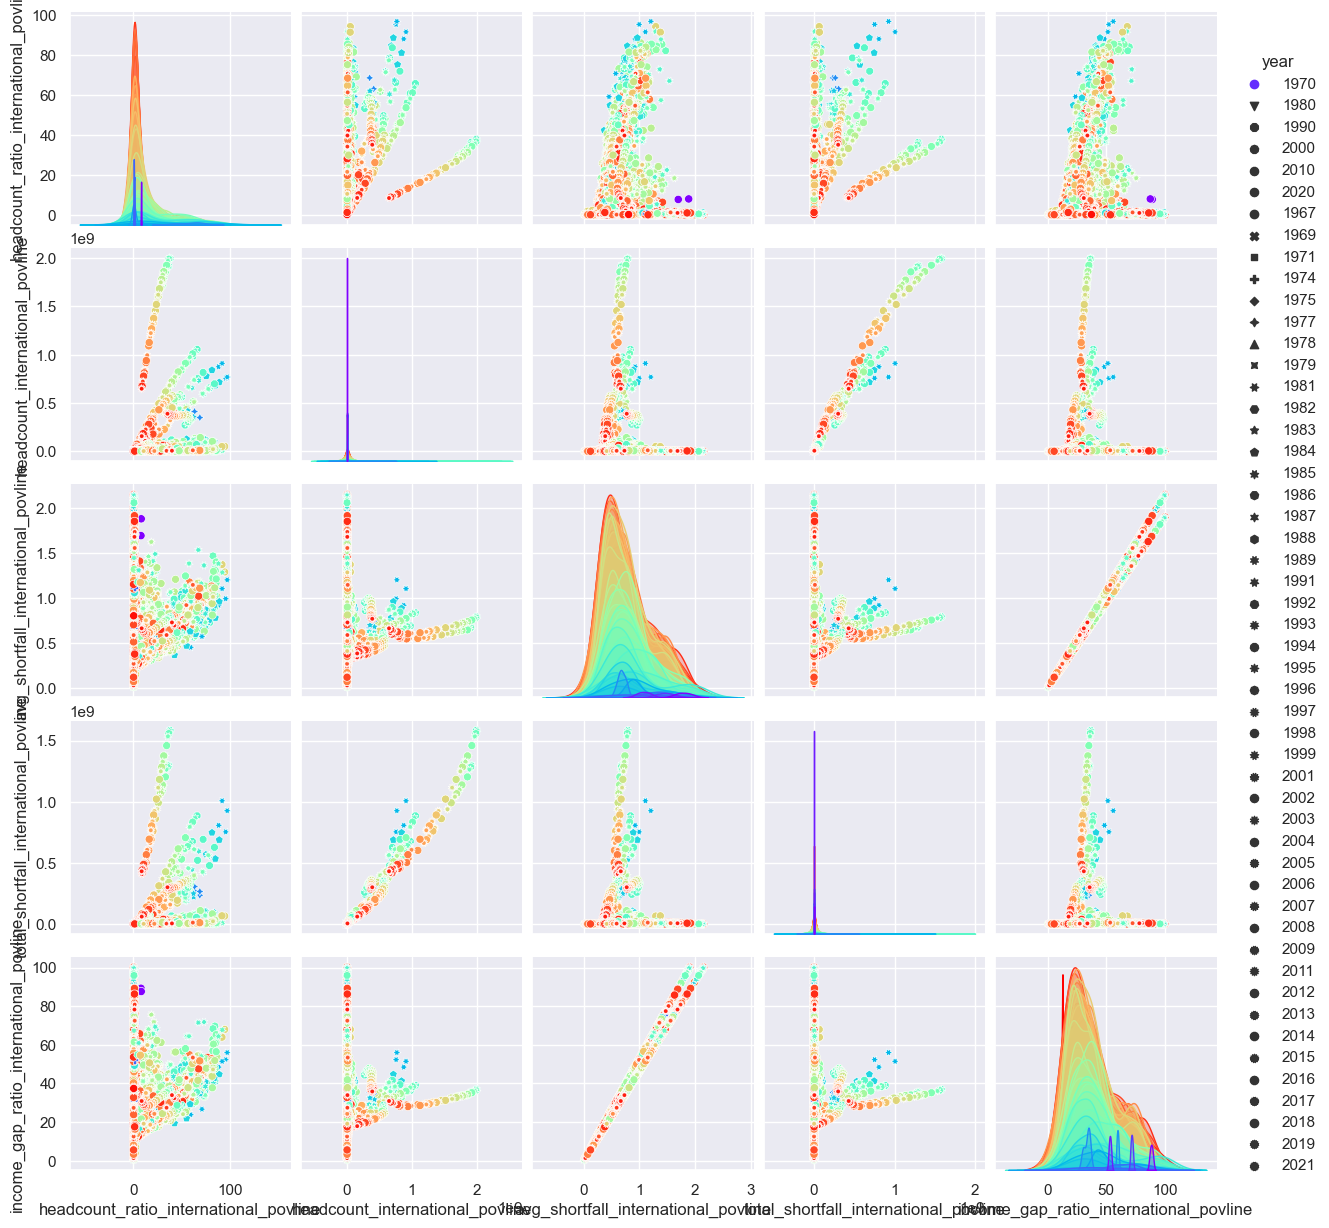

In [25]:
sns.set(rc={"figure.figsize": (36, 26)})
sns.pairplot(partial_df,hue='year',kind='scatter',palette = 'rainbow',markers=True)

In [ ]:
# sns.set(rc={"figure.figsize": (36, 26)})
# sns.pairplot(partial_df,hue='year',kind='hist',palette = 'viridis_r',markers=True)

In [ ]:
# sns.set(rc={"figure.figsize": (16, 16)})
# sns.pairplot(temp_df,hue='year',kind='kde',markers=True)

Text(0.5, 1.0, 'international povety line')

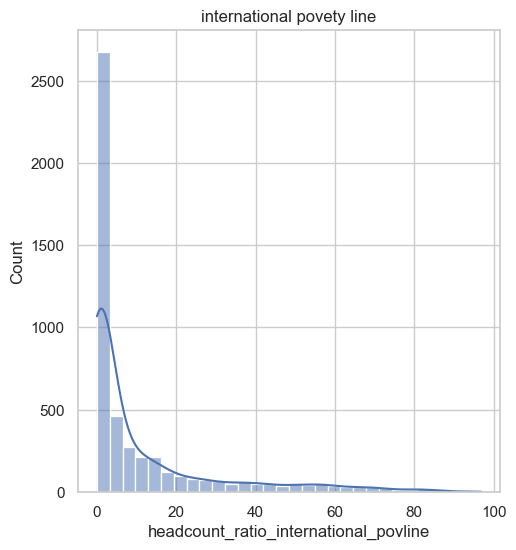

In [20]:
# Visualize data distributions
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Example: Histogram of income distribution
plt.subplot(1, 2, 1)
sns.histplot(df['headcount_ratio_international_povline'], bins=30, kde=True)
plt.title('international povety line')

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='headcount_ratio_international_povline')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001DE0FD4E680> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# fig, axes = plt.subplots(10,3,figsize=(20,20))
# axes = axes.flatten()
# for i, column in enumerate(df.columns):
#     sns.boxplot(df[column],ax=axes[i],palette='viridis')  
#     axes[i].set_title(f"Outliers in {column}")
#     axes[i].set_xlabel('headcount_ratio_40_median')
#     axes[i].set_ylabel(column)
# plt.tight_layout()
# plt.show()

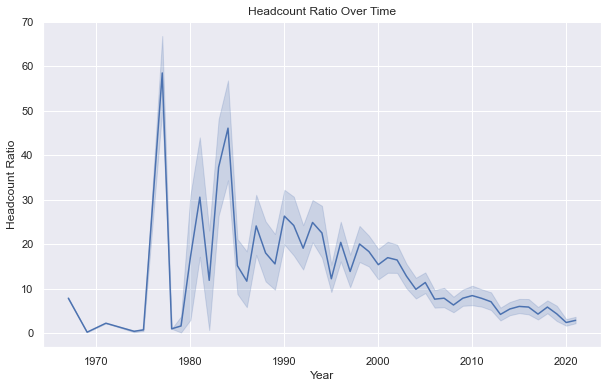

In [42]:
# Line chart for time series variable 'year'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='headcount_ratio_international_povline')
plt.title('Headcount Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Headcount Ratio')
plt.show()

In [ ]:

# Box plot for comparing 'headcount_ratio_international_povline' across 'welfare_type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='welfare_type', y='headcount_ratio_international_povline')
plt.title('Comparison of Headcount Ratio by Welfare Type')
plt.xlabel('Welfare Type')
plt.ylabel('Headcount Ratio')
plt.xticks(rotation=45)
plt.show()

# Heatmap for the correlation matrix of numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [10]:
df['country'].value_counts()

Indonesia       174
China           120
Poland           92
Romania          74
India            72
               ... 
Suriname          2
Lebanon           2
Tuvalu            2
Turkmenistan      2
Somalia           2
Name: country, Length: 177, dtype: int64

## Splitting the data

In [109]:
df= df.dropna()

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['country', 'reporting_level', 'welfare_type'], dtype='object')


In [112]:
x = df.drop(labels=['country','reporting_level','welfare_type'],axis=1)

In [135]:
y = df['reporting_level']
y.value_counts()

national    3291
urban        226
rural        126
Name: reporting_level, dtype: int64

In [136]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [137]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42,shuffle=True)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2732, 105)
(911, 105)
(2732,)
(911,)


In [138]:
ytest

array([0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Model Building

In [139]:
result_df = pd.DataFrame()
result_df['reporting_level'] = label_encoder.inverse_transform(ytest)
result_df.head()

reporting_level
0        national
1        national
2        national
3           urban
4           urban

In [140]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 1. Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
logistic = LogisticRegression(max_iter=20000)

In [180]:
logistic.fit(xtrain,ytrain)
print('Training Accuracy = {}'.format(accuracy_score(ytrain,logistic.predict(xtrain))))

Training Accuracy = 0.8349194729136163


D:\anaconda_python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [181]:
y_predicted_logistic = logistic.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_logistic)))

Testing Accuracy = 0.8090010976948409


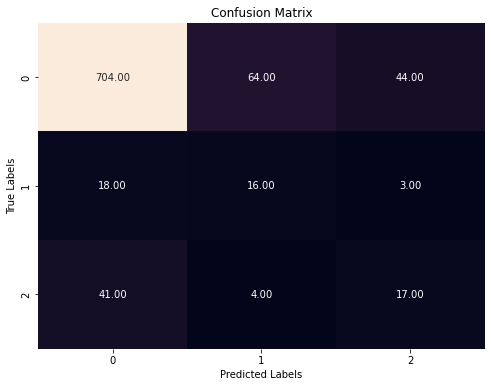

In [182]:
cm = confusion_matrix(ytest, y_predicted_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [183]:
print(classification_report(ytest,y_predicted_logistic))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       812
           1       0.19      0.43      0.26        37
           2       0.27      0.27      0.27        62

    accuracy                           0.81       911
   macro avg       0.46      0.52      0.48       911
weighted avg       0.85      0.81      0.83       911



In [184]:
result_df['Logistic_Test'] = le.inverse_transform(y_predicted_logistic)
result_df.sample(5)

reporting_level  KNN  DecisionTree  Bayesian  RandomForest  Logistic_Test
188        national    2             2         2             2              2
239        national    2             2         6             2              2
172        national    2             2         6             2              2
163           rural    4             4         6             4              2
53            urban    2             6         6             6              2

### 2. KNN Classifier

In [144]:
from sklearn.neighbors import KNeighborsClassifier

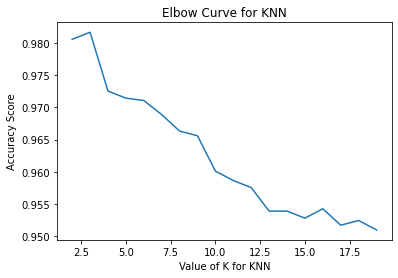

In [145]:
l = range(2, 20)
scores = []
for k in l:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    scores.append(knn.score(xtrain, ytrain))

plt.plot(l, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Elbow Curve for KNN')
plt.show()

In [146]:
# k=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [147]:
print('Training Accuracy = {}'.format(accuracy_score(ytrain,knn.predict(xtrain))))

Training Accuracy = 0.9806002928257687


In [148]:
y_predicted_knn = knn.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_knn)))

Testing Accuracy = 0.9473106476399561


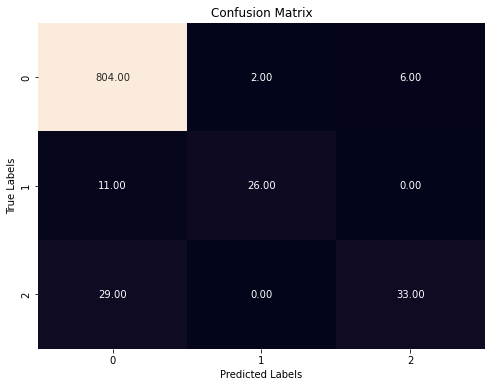

In [149]:
cm2 = confusion_matrix(ytest,y_predicted_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt=".2f", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [150]:
print(classification_report(ytest,y_predicted_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       812
           1       0.93      0.70      0.80        37
           2       0.85      0.53      0.65        62

    accuracy                           0.95       911
   macro avg       0.91      0.74      0.81       911
weighted avg       0.94      0.95      0.94       911



In [151]:
result_df['KNN'] = le.inverse_transform(y_predicted_knn)
result_df.sample(5)

reporting_level  KNN
508        national    2
826        national    2
898        national    2
776           rural    4
278        national    2

### 3. Decision Tree Classifier

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [156]:
print('Training Accuracy = {}'.format(accuracy_score(ytrain,dt.predict(xtrain))))

Training Accuracy = 1.0


In [157]:
y_predicted_DT = dt.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_DT)))

Testing Accuracy = 0.9835345773874863


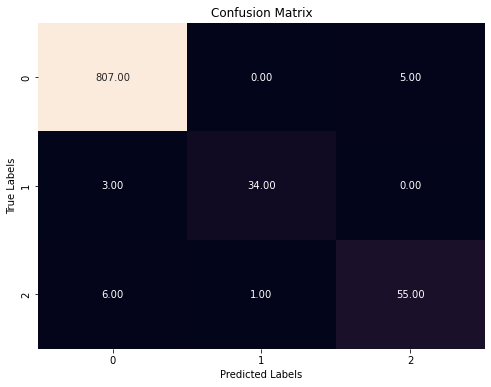

In [158]:
cm3 = confusion_matrix(ytest,y_predicted_DT)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt=".2f", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [159]:
print(classification_report(ytest,y_predicted_DT))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       812
           1       0.97      0.92      0.94        37
           2       0.92      0.89      0.90        62

    accuracy                           0.98       911
   macro avg       0.96      0.93      0.95       911
weighted avg       0.98      0.98      0.98       911



In [160]:
result_df['DecisionTree'] = le.inverse_transform(y_predicted_DT)
result_df.sample(5)

reporting_level  KNN  DecisionTree
536        national    2             2
550        national    2             2
498        national    2             2
571        national    2             2
253        national    2             2

### 4. Bayesian Classifier 

In [161]:
from sklearn.naive_bayes import GaussianNB

In [162]:
naive = GaussianNB()
naive.fit(xtrain, ytrain)

GaussianNB()

In [163]:
print('Training Accuracy = {}'.format(accuracy_score(ytrain,naive.predict(xtrain))))

Training Accuracy = 0.14348462664714495


In [164]:
y_predicted_naive = naive.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_naive)))

Testing Accuracy = 0.1437980241492865


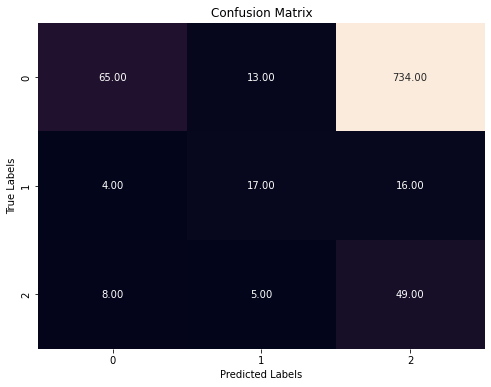

In [165]:
cm4 = confusion_matrix(ytest,y_predicted_naive)
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt=".2f", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [166]:
print(classification_report(ytest,y_predicted_naive))

              precision    recall  f1-score   support

           0       0.84      0.08      0.15       812
           1       0.49      0.46      0.47        37
           2       0.06      0.79      0.11        62

    accuracy                           0.14       911
   macro avg       0.46      0.44      0.24       911
weighted avg       0.78      0.14      0.16       911



In [167]:
result_df['Bayesian'] = le.inverse_transform(y_predicted_naive)
result_df.sample(5)

reporting_level  KNN  DecisionTree  Bayesian
628        national    2             2         6
508        national    2             2         6
807        national    2             2         6
349        national    2             2         6
261        national    2             2         6

### 5. Random Forest Classifier

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [170]:
print('Training Accuracy = {}'.format(accuracy_score(ytrain,rf.predict(xtrain))))

Training Accuracy = 1.0


In [171]:
y_predicted_rf = rf.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_rf)))

Testing Accuracy = 0.9901207464324918


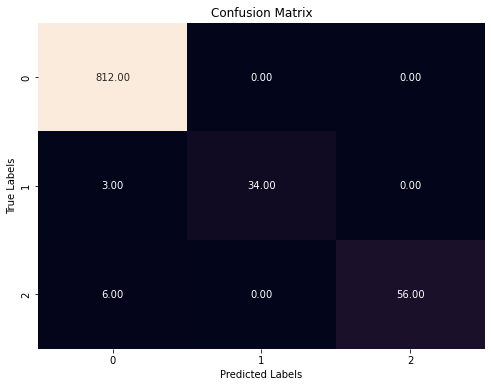

In [172]:
cm5 = confusion_matrix(ytest,y_predicted_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt=".2f", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [173]:
print(classification_report(ytest,y_predicted_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       812
           1       1.00      0.92      0.96        37
           2       1.00      0.90      0.95        62

    accuracy                           0.99       911
   macro avg       1.00      0.94      0.97       911
weighted avg       0.99      0.99      0.99       911



In [174]:
result_df['RandomForest'] = le.inverse_transform(y_predicted_rf)
result_df.sample(5)

reporting_level  KNN  DecisionTree  Bayesian  RandomForest
740        national    2             2         6             2
665        national    2             2         6             2
637        national    2             2         6             2
368        national    2             2         6             2
402        national    2             2         6             2

## Comparing the models

In [175]:
from sklearn.metrics import roc_curve, auc

In [176]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [185]:
y_probs_1 = logistic.predict_proba(xtest)
y_probs_2 = knn.predict_proba(xtest)
y_probs_3 = dt.predict_proba(xtest)
y_probs_4 = naive.predict_proba(xtest)
y_probs_5 = rf.predict_proba(xtest)

In [188]:
n_classes = len(np.unique(ytest))
n_classes

3

In [189]:
for i in range(n_classes):
    y_test_i = (ytest == i)
    y_score_1 = y_probs_1[:, i]
    y_score_2 = y_probs_2[:, i]
    y_score_3 = y_probs_3[:, i]
    y_score_4 = y_probs_4[:, i]
    y_score_5 = y_probs_5[:, i]
    fpr[1], tpr[1], _ = roc_curve(y_test_i, y_score_1)
    fpr[2], tpr[2], _ = roc_curve(y_test_i, y_score_2)
    fpr[3], tpr[3], _ = roc_curve(y_test_i, y_score_3)
    fpr[4], tpr[4], _ = roc_curve(y_test_i, y_score_4)
    fpr[5], tpr[5], _ = roc_curve(y_test_i, y_score_5)
    roc_auc[1] = auc(fpr[1], tpr[1])
    roc_auc[2] = auc(fpr[2], tpr[2])
    roc_auc[3] = auc(fpr[3], tpr[3])
    roc_auc[4] = auc(fpr[4], tpr[4])
    roc_auc[5] = auc(fpr[5], tpr[5])


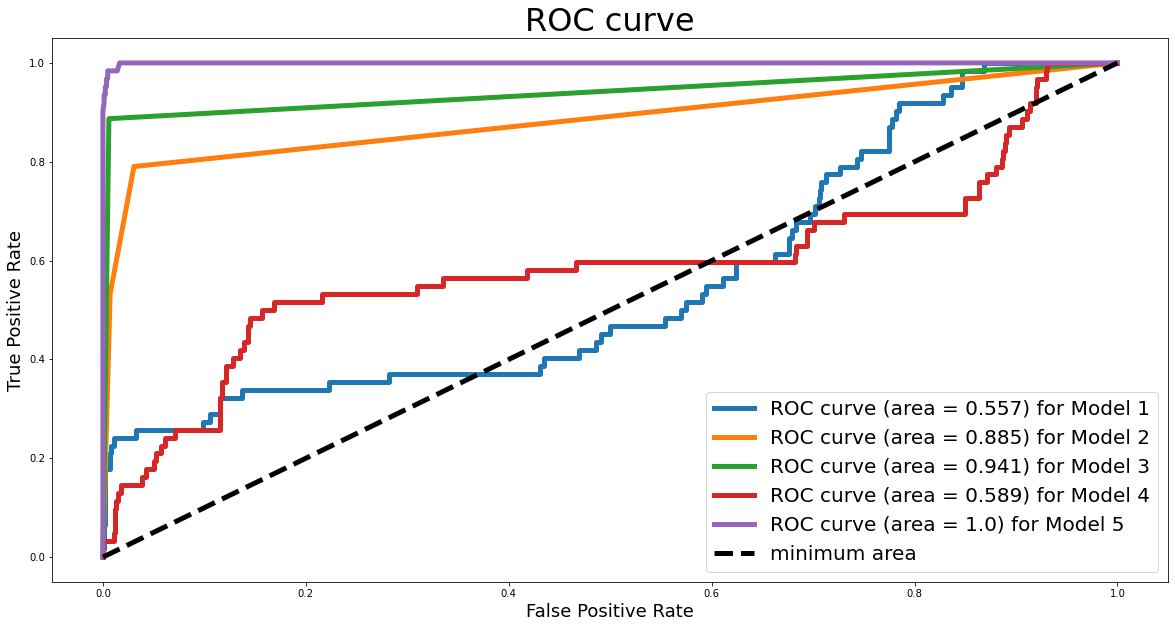

In [191]:
plt.figure(figsize=(20,10))
lw = 5
for i in range(1, lw+1):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = {}) for Model {}'.format(round(roc_auc[i],3), i))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k', label='minimum area')
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('ROC curve',fontsize=32)
plt.legend(loc="lower right",fontsize=20)
plt.show()

### Model5 is Random Forest classifier that has good roc score

## Saving the model

In [192]:
import pickle

In [ ]:
pickle.dump(rf,open('my_poverty_model.pkl','wb'))